**Logistic Regression from Scratch**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#getting the data ready for modelling
y = df.target
X = df.drop('target', axis = 1)
#X = pd.get_dummies(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
score = accuracy_score(y_test, preds)
print(score)


0.8365758754863813


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.values.reshape(m,1)
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
w, b, l = train(X_train, y_train, bs=100, epochs=1000, lr=0.01)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

accuracy(y_test, predict(X_test))

0.8521400778210116

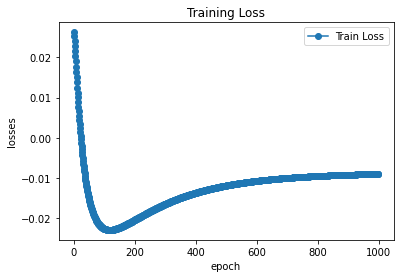

In [ ]:
plt.plot(l,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train Loss'])
plt.title('Training Loss')

plt.show()


**Logistic Regression using PCA**

In [ ]:
#importing dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#splitting target and predictors and normalizing them
y = df.target
X = df.drop('target', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

#now we check variance caused by each principal component
ev = pca.explained_variance_ratio_
print(ev)
print(sum(ev))

[0.25102783 0.12077624 0.09034711 0.08421682 0.07489976 0.07273688
 0.06999945 0.0548915  0.05315806 0.043025   0.03279201 0.02877852
 0.02335084]
0.9999999999999999


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
score = accuracy_score(y_test, preds)
print(score)


0.8054474708171206


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 1)
classifier.fit(X_train, y_train)
rfc_pred = classifier.predict(X_test)
score = accuracy_score(y_test, rfc_pred)
print(score)

0.8443579766536965


**Using SVM to classify**

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 1)
svc_model = classifier.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print(accuracy_score(svc_pred, y_test))



0.8365758754863813


**Accuracy Comparision**
Accuracy of Logistic Regression without PCA: 85.2%, 
Accuracy of Logisitc Regression with PCA: 80.5%, 
Accuracy of Random Forest: 84.4%,
Accuracy of SVM: 83.6% 

Here we can see that PCA actually reduced performance for our Logistic Regression model. Since our dataset has only 13 features applying PCA causes some information loss which turns out to be quite significant in our case, reducing the accuracy by 5%.

When we compare Logistic Regression to other models, we can see that the accuracy of each model is almost very similar. Again this is due to the fact that our dataset has only 13 Features and 1025 Training examples which causes the models to underfit and hence bottlenecks the performance.

**Multiclass Classification using Neural Networks**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import keras.backend as K
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('FIFA19.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder


In [8]:
#removing missing values
df = df[pd.notnull(df['Position'])]

#checking all columns in df
col_list = df.columns.values.tolist()
print(col_list)

#checking all values in Position column
print(df.Position.unique())

['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'League', 'Speciality']
['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


In [9]:
#getting required columns 
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

#classifying all positions into categories
forward = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfield = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defence = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

#converting into numeric categories
df.loc[df["Position"] == "GK", "Position"] = 0

df.loc[df["Position"].isin(defence), "Position"] = 1

df.loc[df["Position"].isin(midfield), "Position"] = 2

df.loc[df["Position"].isin(forward), "Position"] = 3

print(df.Position)

0        3
1        3
2        3
3        0
4        2
        ..
18142    2
18143    3
18144    3
18145    3
18146    2
Name: Position, Length: 18147, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [25]:
#splitting target and predictor 
y = df['Position']
X = df.drop('Position', axis = 1)

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
y_new = to_categorical(y)

#using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.25)

In [26]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [27]:
#building the network
model = Sequential()
model.add(Dense(60, input_shape = (33,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 60)                2040      
                                                                 
 dense_10 (Dense)            (None, 15)                915       
                                                                 
 dense_11 (Dense)            (None, 4)                 64        
                                                                 
Total params: 3,019
Trainable params: 3,019
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
#fitting model
model.fit(X_train, y_train, verbose = 1, epochs = 20)

Epoch 1/20
426/426 [==============================] - 2s 3ms/step - loss: 0.3578 - accuracy: 0.8510
Epoch 2/20
426/426 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.8689
Epoch 3/20
426/426 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8749
Epoch 4/20
426/426 [==============================] - 1s 2ms/step - loss: 0.2997 - accuracy: 0.8738
Epoch 5/20
426/426 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8785
Epoch 6/20
426/426 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8763
Epoch 7/20
426/426 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.8813
Epoch 8/20
426/426 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.8851
Epoch 9/20
426/426 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.8860
Epoch 10/20
426/426 [==============================] - 2s 4ms/step - loss: 0.2836 - accuracy: 0.8825

In [32]:
#testing model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(accuracy_score(y_pred, y_test))

0.8800969803835134


Hence, our neural network model has an accuracy of 88 percent.